In [77]:
###Reference###
#https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

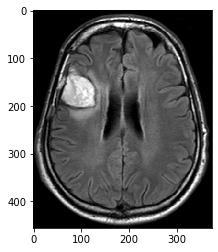

In [78]:
image = plt.imread('brain_tumor_dataset/yes/Y7.jpg')
image.shape
plt.imshow(image)

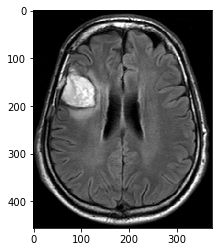

In [79]:
img_copy = image.copy()
gray = rgb2gray(img_copy)     # for make image writteable
plt.imshow(gray, cmap='gray')

In [80]:
gray.shape

(456, 374)

The height and width of the image is 360 and 319 respectively. <b>We will take the mean of the pixel values and use that as a threshold.</b> If the pixel value is more than our threshold, we can say that it belongs to an object(Brain). If the pixel value is less than the threshold, it will be treated as the background. Let’s code this:

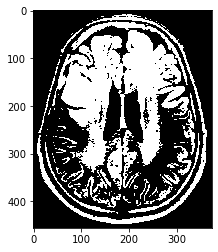

In [81]:
gray_r = gray.reshape(gray.shape[0] * gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0], gray.shape[1])

plt.imshow(gray, cmap='gray')

The darker region (black) represents the background and the brighter (white) region is the Brain. We can define multiple thresholds as well to detect multiple regions in the brain:

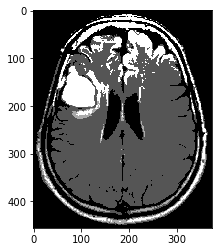

In [82]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0] * gray.shape[1])
gray_rc = gray_r.copy()

for i in range(gray_rc.shape[0]):
    if gray_rc[i] > gray_rc.mean():
        gray_rc[i] = 3
    elif gray_rc[i] > 0.5:
        gray_rc[i] = 2
    elif gray_rc[i] > 0.25:
        gray_rc[i] = 1
    else:
        gray_rc[i] = 0
        
gray = gray_rc.reshape(gray.shape[0], gray.shape[1])

plt.imshow(gray, cmap = 'gray')

There are four different segments in the above image. You can set different threshold values and check how the segments are made.<br>
<h1>Footnotes</h1>
<br>
Some of the advantages of this method are:<br><br>

1.Calculations are simpler<br>
2.Fast operation speed<br>
3.When the object and background have high contrast, this method performs really well<br><br>
But there are some limitations to this approach. When we don’t have significant grayscale difference, or there is an overlap of the grayscale pixel values, it becomes very difficult to get accurate segments.

 

